In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functions.inequality import gini
from matplotlib import style

In [2]:
style.use('seaborn-ticks')

# Repeat the simple experiment from McBride 2014

https://taxfoundation.org/market-volatility-alone-can-cause-inequality/

If you take 100 individuals and give them each a random rate of return every year for 100 years, it turns out that market volatility alone generates a tremendous amount of wealth inequality.

create 100 individuals with equal wealth 

generate random return for each of them for 100 periods

change stdev return 

In [67]:
periods = 100
stdev_low = 0.01
stdev_high = 0.10

In [68]:
# create 100 individuals equal wealth
pop_size = 3

population_low = [[10] for x in range(pop_size)]
population_high = [[10] for x in range(pop_size)]

For 100 periods generate a random return for every agent with an average of 0 and a standard devation of $\sigma$

In [69]:
# evolve low standard deviation population
for i in range(pop_size):
    returns = np.random.normal(loc=0.0, scale=stdev_low, size=periods)
    for x in range(1, len(returns)):
        population_low[i].append(population_low[i][-1] * (1 + returns[x]))

In [70]:
# evolve high standard deviation population
for i in range(pop_size):
    returns = np.random.normal(loc=0.0, scale=stdev_high, size=periods)
    for x in range(1, len(returns)):
        population_high[i].append(population_high[i][-1] * (1 + returns[x]))

Calculate the palma ratio of the population for a certain time period

In [71]:
#t = 99
wealth_distr_low_vol = [population_low[agent][periods-1] for agent in range(pop_size)]
wealth_distr_high_vol = [population_high[agent][periods-1] for agent in range(pop_size)]

In [72]:
def calc_palma(wealth_distr):
    share_top_10 = sum(np.sort(wealth_distr)[int(len(wealth_distr) * 0.9):]) / sum(wealth_distr)
    share_bottom_40 = sum(np.sort(wealth_distr)[:int(len(wealth_distr) * 0.4)]) / sum(wealth_distr)
    return share_top_10 / share_bottom_40

In [73]:
palma_low = calc_palma(wealth_distr_low_vol)
palma_high = calc_palma(wealth_distr_high_vol)
print('palma low volatility: ', palma_low)
print('palma high volatility: ', palma_high)

palma low volatility:  1.0857128413803268
palma high volatility:  10.598035020338807


In [74]:
gini_low = gini(np.array(wealth_distr_low_vol))
gini_high = gini(np.array(wealth_distr_high_vol))
print('gini low volatility: ', gini_low)
print('gini high volatility: ', gini_high)

gini low volatility:  0.018080745612538834
gini high volatility:  0.43641538662224155


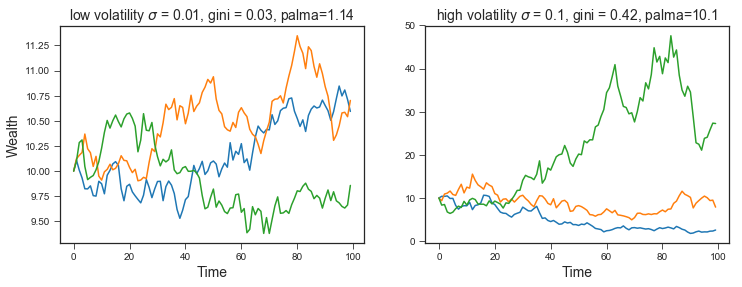

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for a in population_low:
    ax1.plot(range(len(a)), a)
    
ax1.set_title('low volatility $\sigma$ = {}, gini = {}, palma={}'.format(stdev_low, 0.03, 1.14), fontsize='14')
ax1.set_ylabel('Wealth', fontsize='14')
    
for b in population_high:
    ax2.plot(range(len(b)), b)
    
ax2.set_title('high volatility $\sigma$ = {}, gini = {}, palma={}'.format(stdev_high, 0.42, 10.1), fontsize='14')

for ax in [ax1, ax2]:
    ax.set_xlabel('Time', fontsize='14')
    
fig.savefig('simple_experiment.png')